# Ridge y Lasso

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)
X.shape, y.shape

((20640, 8), (20640,))

## Concepto

In [2]:
ridge_model = Ridge(alpha=1e3)
ridge_model.fit(X, y)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [3]:
ridge_model.coef_

array([ 4.00386230e-01,  1.06961098e-02, -3.57913015e-02,  2.52231630e-01,
        7.17853708e-07, -3.78892720e-03, -3.78806814e-01, -3.84230806e-01])

In [4]:
X.AveRooms.corr(y)

0.15194828974145774

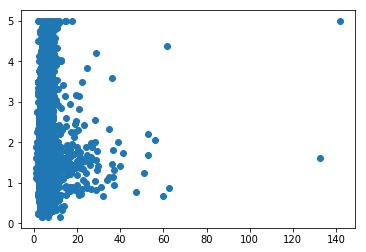

In [5]:
plt.scatter(X.AveRooms, y);

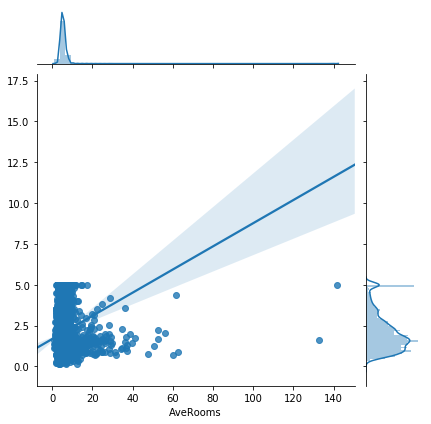

In [6]:
sns.jointplot(X.AveRooms, y, kind='reg');

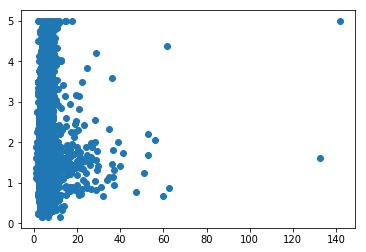

In [7]:
plt.scatter(X.AveRooms, y);

In [8]:
coefs = pd.Series(ridge_model.coef_, index=X.columns)
coefs.sort_values(ascending=False, inplace=True)
coefs.round(2)

MedInc        0.40
AveBedrms     0.25
HouseAge      0.01
Population    0.00
AveOccup     -0.00
AveRooms     -0.04
Latitude     -0.38
Longitude    -0.38
dtype: float64

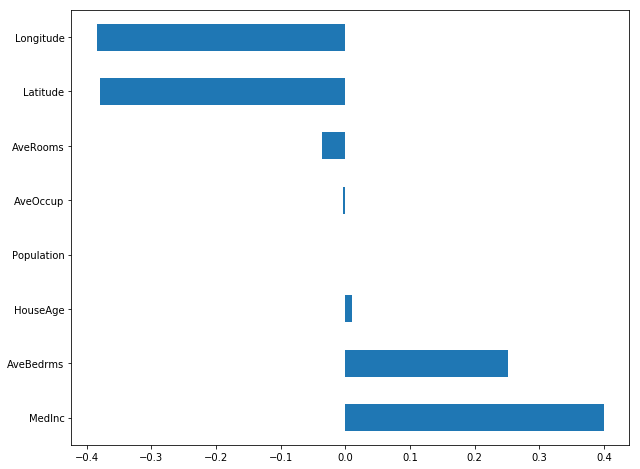

In [9]:
%matplotlib inline
coefs.plot.barh(figsize=(10, 8));

In [10]:
lasso_model = Lasso(alpha=1e0)
lasso_model.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
lasso_model.coef_

array([ 1.45469232e-01,  5.81496884e-03,  0.00000000e+00, -0.00000000e+00,
       -6.37292607e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [12]:
coefs = pd.Series(lasso_model.coef_, index=X.columns)
coefs.sort_values(ascending=False, inplace=True)
coefs

MedInc        0.145469
HouseAge      0.005815
Longitude    -0.000000
Latitude     -0.000000
AveOccup     -0.000000
AveBedrms    -0.000000
AveRooms      0.000000
Population   -0.000006
dtype: float64

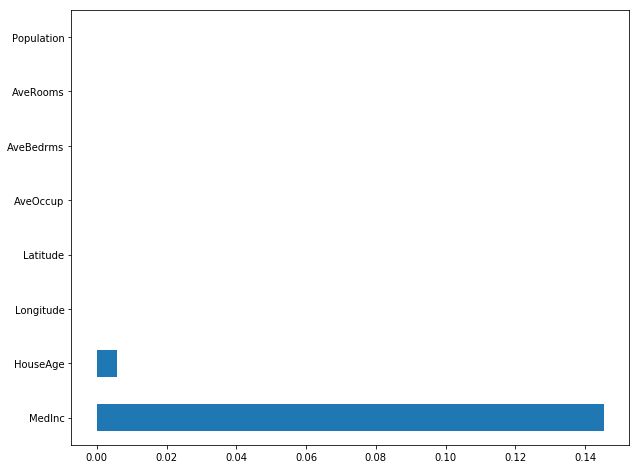

In [13]:
coefs.plot.barh(figsize=(10, 8));

In [14]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Pipeline

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Pipeline:
- **Transformadores:** tienen `fit` y `transform`
- **Estimador:** tiene `fit` y `predict`

### Escalador

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [16]:
scaler.mean_, scaler.var_

(array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
         1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02]),
 array([3.60914769e+00, 1.58388586e+02, 6.12123614e+00, 2.24580619e-01,
        1.28240832e+06, 1.07864799e+02, 4.56207160e+00, 4.01394488e+00]))

### Pipeline

In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                ('estimator', Lasso(alpha=1e-2))])
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [18]:
pipe.predict(X)

array([4.07830615, 3.89554458, 3.71436471, ..., 0.29790121, 0.42669649,
       0.61126869])

In [19]:
pipe.steps[1][1].coef_

array([ 0.77722333,  0.12486709, -0.12940585,  0.16912537, -0.        ,
       -0.02944551, -0.79543737, -0.75899738])

## CV

### Train test split

In [20]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     train_size=0.8, 
                                                     random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/home/infinitemonkeys/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((16512, 8), (16512,), (4128, 8), (4128,))

In [21]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [22]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, pipe.predict(X_train))

0.5350523081546384

In [23]:
mae(y_test, pipe.predict(X_test))

0.5400817151781666

In [24]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('estimator', Ridge())])

### Grid search

In [25]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures


alpha_vec = np.logspace(-1, 1, 30)

test_error_list = []
train_error_list = []

for alpha in alpha_vec:
    pipe = Pipeline([('polyfeat', PolynomialFeatures()),
                     ('scaler', StandardScaler()),
                     ('estimator', Ridge(alpha))])

    pipe.fit(X_train, y_train)

    train_error = mse(y_train, pipe.predict(X_train))
    test_error = mse(y_test, pipe.predict(X_test))

    train_error_list.append(train_error)
    test_error_list.append(test_error)

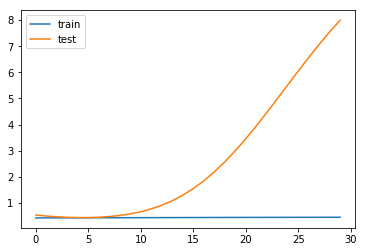

In [26]:
plt.plot(train_error_list);
plt.plot(test_error_list);
plt.legend(['train', 'test']);

In [27]:
np.argmin(test_error_list)

4

In [28]:
alpha_vec[np.argmin(test_error_list)]

0.18873918221350972

In [29]:
np.min(test_error_list)

0.44037904414857504

In [30]:
from sklearn.linear_model import LinearRegression

lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
mse(y_test, lin_mod.predict(X_test))

0.5289841670367209